# Obesity Risk Prediction Using a Neural Network

This notebook builds a multi-class classification model to predict an individual's obesity level using health and lifestyle factors. The model uses a feedforward neural network trained on a shared train/test split for comparison with other algorithms (e.g. KNN, Logistic Regression).

In [21]:
# 1. Import all necessary libraries for preprocessing, modeling, and evaluation

# Data manipulation
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# 2. Load preprocessed training and test data from feather files
# These files use a consistent train/test split shared across the group for fair model comparison

train_df = pd.read_feather('../processed_data/train_data.feather')
test_df = pd.read_feather('../processed_data/test_data.feather')

# Split into input features (X) and target labels (y)
X_train = train_df.drop(columns='obesity_level')
y_train = train_df['obesity_level']
X_test = test_df.drop(columns='obesity_level')
y_test = test_df['obesity_level']


In [23]:
# 3. Encode target labels, one-hot categorical features, and scale numeric features

from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

# One-hot encode categorical input features (e.g. gender, transport_mode, etc.)
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align columns in case train and test sets have slightly different one-hot outputs
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Encode target labels (obesity_level) as integers, then one-hot encode for classification
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Scale input features to have mean 0 and std 1 (important for neural network training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# 4. Build and compile a feedforward neural network for multi-class classification

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a simple neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer
    Dropout(0.5),                                                           # Regularization
    Dense(32, activation='relu'),                                           # Hidden layer
    Dropout(0.5),                                                           # Regularization
    Dense(y_train_categorical.shape[1], activation='softmax')              # Output layer (7 classes)
])

# Compile the model with appropriate loss and optimizer for multi-class classification
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/opt/anaconda3/envs/dsa_2025_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# 5. Train the neural network on the training data
# Use 20% of the training set for validation to monitor performance during training

history = model.fit(
    X_train_scaled, y_train_categorical,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=50,             # Number of passes over the training data
    batch_size=32,         # Number of samples per gradient update
    verbose=1              # Print training progress
)


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1596 - loss: 2.2763 - val_accuracy: 0.3669 - val_loss: 1.7950
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2615 - loss: 2.0156 - val_accuracy: 0.5296 - val_loss: 1.6677
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.2996 - loss: 1.8234 - val_accuracy: 0.5710 - val_loss: 1.5366
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.3209 - loss: 1.7345 - val_accuracy: 0.5888 - val_loss: 1.4238
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.3657 - loss: 1.6177 - val_accuracy: 0.6331 - val_loss: 1.3260
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.4207 - loss: 1.5887 - val_accuracy: 0.6302 - val_loss: 1.2429
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.4473 - loss: 1.4697 - val_accuracy: 0.6331 - val_loss: 1.1631
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.4731 - loss: 1.4460 - val_accuracy: 0.6479

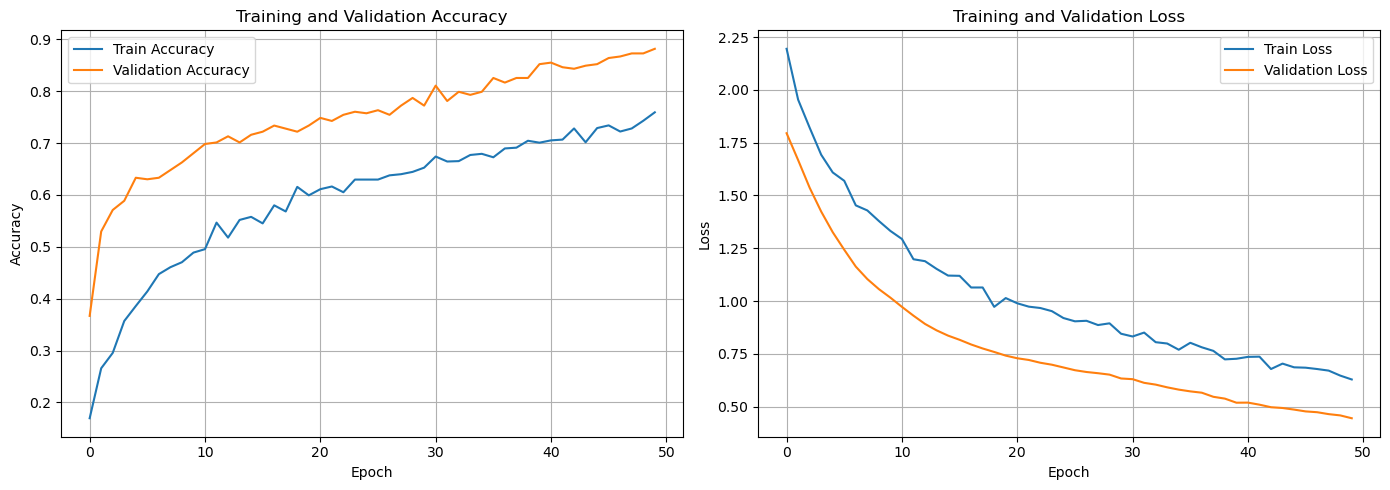

In [26]:
# 5b. Plot training and validation accuracy and loss over epochs

import matplotlib.pyplot as plt

# Set up side-by-side plots
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**The two plots above show the model’s training progress over 50 epochs:**

- Left Plot: Accuracy
  - Both training and validation accuracy steadily improve.
  - Validation accuracy consistently outperforms training accuracy — this may suggest the model is generalizing well and not overfitting.
  - Around epoch 40+, accuracy starts to plateau near 85–88%.

- Right Plot: Loss
  - Training and validation loss both decrease consistently, which indicates stable learning.
  - The smooth downward curve suggests no major learning disruptions (like divergence or instability).
  - Validation loss remains below training loss, which aligns with the accuracy trend.

Together, these plots suggest the model is learning effectively and is well-regularized (Dropout seems to be helping).

In [27]:
# 6. Evaluate the model on the test set

# This checks how well the model performs on truly unseen data
# Accuracy and loss on the test set provide a realistic estimate of generalization

loss, accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


Test Accuracy: 0.8392
Test Loss: 0.4386


**Test Set Performance Summary:**
- Test Accuracy: 83.9%
- Test Loss: 0.44

This means the model correctly classified around 84% of individuals in the test set across seven obesity categories.  
A test loss of 0.44 indicates that the model’s predictions are generally confident and well-calibrated.

These metrics suggest the neural network is generalizing well to unseen data, with no signs of major overfitting or underfitting — especially when viewed alongside the validation curves.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


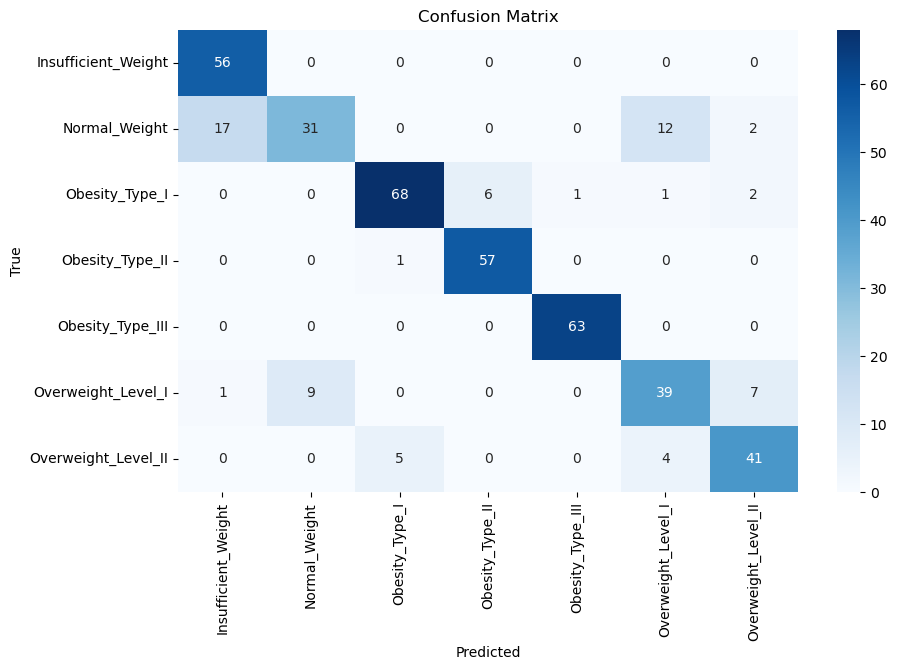

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      1.00      0.86        56
      Normal_Weight       0.78      0.50      0.61        62
     Obesity_Type_I       0.92      0.87      0.89        78
    Obesity_Type_II       0.90      0.98      0.94        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.70      0.70      0.70        56
Overweight_Level_II       0.79      0.82      0.80        50

           accuracy                           0.84       423
          macro avg       0.83      0.84      0.83       423
       weighted avg       0.84      0.84      0.83       423



In [28]:
# 7. Generate confusion matrix and classification report for detailed evaluation

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities on the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert predicted and true one-hot labels to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print precision, recall, and F1-score for each class
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


**Confusion Matrix & Classification Interpretation:**
These outputs provide a detailed look at how the model performs for each of the 7 obesity categories.

**Confusion Matrix**
- The matrix shows true labels (rows) vs. predicted labels (columns).
- Most predictions fall along the diagonal, which indicates correct classification.
- Some confusion exists between:
  - Normal_Weight and both Overweight_Level_I and Insufficient_Weight — this makes sense, as these categories are often close in lifestyle indicators.
  - Obesity_Type_I and Overweight_Level_II, suggesting some overlap in their features.

**Classification Report**
- Obesity_Type_III has near-perfect performance: precision = 0.98, recall = 1.00.
- Normal_Weight is the hardest to classify (F1-score = 0.61), likely due to it being in the "middle zone" between weight extremes.
- Most other classes show strong F1-scores above 0.80.
- Macro Avg and Weighted Avg F1-Scores = 0.83, which means the model performs quite evenly across the classes — even with some class imbalance.

Overall, the model is doing very well and captures both the extreme and intermediate obesity categories with good balance and generalization.

**Final Summary:**
This notebook implemented a neural network to classify individuals into seven obesity risk categories based on lifestyle and health data.

- The model achieved **84% accuracy** on the test set.
- It performed especially well on both high-risk and low-risk obesity levels.
- Training curves and evaluation metrics show **stable learning** and **good generalization**.